In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install word2number

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from word2number import w2n

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Salary_dataset/employee_salary.csv')

In [ ]:
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,5,55000
3,two,10.0,7,65000
4,seven,9.0,6,75000
5,three,7.0,10,62000
6,ten,7.0,9,70000
7,eleven,NaN,10,80000
8,four,4.0,7,67000
9,five,5.0,8,58000


In [ ]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,5,55000
3,two,10.0,7,65000
4,seven,9.0,6,75000
5,three,7.0,10,62000
6,ten,7.0,9,70000
7,eleven,NaN,10,80000
8,four,4.0,7,67000
9,five,5.0,8,58000


In [ ]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,5,55000
3,2,10.0,7,65000
4,7,9.0,6,75000
5,3,7.0,10,62000
6,10,7.0,9,70000
7,11,NaN,10,80000
8,4,4.0,7,67000
9,5,5.0,8,58000


In [ ]:
df.test_score = df.test_score.fillna(df.test_score.median())
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,5,55000
3,2,10.0,7,65000
4,7,9.0,6,75000
5,3,7.0,10,62000
6,10,7.0,9,70000
7,11,7.0,10,80000
8,4,4.0,7,67000
9,5,5.0,8,58000


In [ ]:
df.test_score.median()

7.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       12 non-null     int64  
 1   test_score       12 non-null     float64
 2   interview_score  12 non-null     int64  
 3   salary           12 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 512.0 bytes


In [ ]:
df.experience = df.experience.astype(int)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,5,55000
3,2,10.0,7,65000
4,7,9.0,6,75000
5,3,7.0,10,62000
6,10,7.0,9,70000
7,11,7.0,10,80000
8,4,4.0,7,67000
9,5,5.0,8,58000


In [ ]:
df.test_score = df.test_score.astype(int)
df

,experience,test_score,interview_score,salary
0,0,8,9,50000
1,0,8,6,45000
2,5,6,5,55000
3,2,10,7,65000
4,7,9,6,75000
5,3,7,10,62000
6,10,7,9,70000
7,11,7,10,80000
8,4,4,7,67000
9,5,5,8,58000


In [ ]:
df.describe()

,experience,test_score,interview_score,salary
count,12.000000,12.000000,12.000000,12.000000
mean,5.083333,7.166667,7.416667,62833.333333
std,3.629634,1.749459,1.729862,13516.544296
min,0.000000,4.000000,5.000000,42000.000000
25%,2.750000,6.000000,6.000000,53750.000000
50%,5.000000,7.000000,7.000000,63500.000000
75%,7.500000,8.250000,9.000000,71250.000000
max,11.000000,10.000000,10.000000,85000.000000


<BarContainer object of 12 artists>

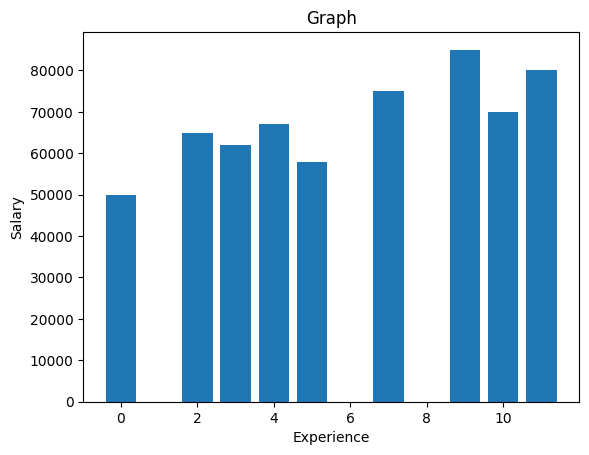

In [ ]:
%matplotlib inline
plt.title('Graph')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.bar(df.experience,df.salary)


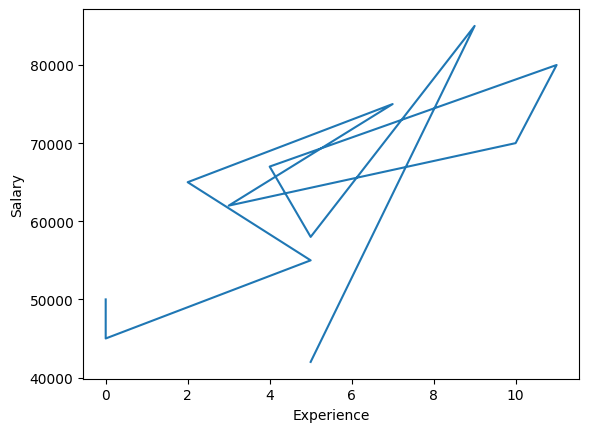

In [ ]:
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.plot(df.experience,df.salary)

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
input_data = df.drop(columns='salary')
output_data =df.salary

In [ ]:
input_data

,experience,test_score,interview_score
0,0,8,9
1,0,8,6
2,5,6,5
3,2,10,7
4,7,9,6
5,3,7,10
6,10,7,9
7,11,7,10
8,4,4,7
9,5,5,8


In [ ]:
output_data

0     50000
1     45000
2     55000
3     65000
4     75000
5     62000
6     70000
7     80000
8     67000
9     58000
10    85000
11    42000
Name: salary, dtype: int64

In [ ]:
model.fit(input_data,output_data)

LinearRegression()

In [ ]:
model.predict([[2,10,8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62045.94438007])